**DATA DESCRIPTION**

THIS FILE CONTAINS 50 IMAGES OF EACH BOLLYWOOD STARS NAMES, AJAY DAMIR KHAN, AJAY DEVGUN, AKSHAY KUMAR, AMITABH BACHAN, DEEPIKA PADUKONE, ILEANA, DISHA PATHANI, FARHAN AKHTAR

**OBJECTIVE**

TO CREATE AN ANN MODEL THAT WILL BE FEEDED WITH INPUTS AND WILL  PREDICT THE CELEBRITIES.

**PLAN OF ACTION**

- IMPORT LIBRARIES.
- CONNECTING DO DRIVE TO GET DATA.
- CREATING FEATURE ARRAY  AND TARGET VARIABLE FOR EACH IMAGE.
- REDUCING DIMENSIONALITY USING PCA.
- APPLYING LDA.
- BUILDING AND TRAINING AN ML MODEL.
- CHECKING ACCURACY FOR TEST DATA.
- CHECKING THE MODEL PREDICTIONS WITH IMPOSTERS.

##DOWNLOADING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import *

##CONNECTING DRIVE TO GET DATA.

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data'

In [ ]:
#STORING TARGETVARIABLE AND
#EXTRACTING SUB FOLDER FROM THE DATA FOLDER
subfile=[]
names=[]
for i in os.listdir(path):
    names.append(i)
    subfile.append(os.path.join(path,i)+'/')

In [ ]:
print(subfile)
print()
print(names)

['/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Aamir/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Ajay/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Akshay/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Alia/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Amitabh/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Deepika/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Disha/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Farhan/', '/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/Data/Ileana/']

['Aamir', 'Ajay', 'Akshay', 'Alia', 'Amitabh', 'Deepika', 'Disha', 'Farhan', 'Ileana']


In [ ]:
#GETTING IMAGE FROM EACH SUB-DIRECTORY AND STORING IT INTO ARRAY

input_features=[]
target=[]
for i in subfile:
   for j in os.listdir(i):
        img= (cv2.imread(i+j))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   #to reduce from 3d to 2d
        img=cv2.resize(img,(300,300))         #bringing all images to same scale
        img= img.flatten()                    #converting to 1d as we will be using ANN to predict the model
        input_features.append(img)
        target.append(i.split('/')[8])

x= np.array(input_features)
target_names= np.array(target)

In [ ]:
#CONVERTING THE TARGET VARIABLE INTO NUMERICAL FORM.
le= LabelEncoder()
y= le.fit_transform(target_names)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

In [ ]:
print("input matrix dimension:", x.shape)
print("Number of classes:",len(names))
print("input features:", x.shape[0])
print("target variable length:", y.shape[0])

input matrix dimension: (450, 90000)
Number of classes: 9
input features: 450
target variable length: 450


In [ ]:
#SPLITTING DATA INTO TRAINING AND TESTING.

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.1, random_state= 40)
print(x.shape, xtrain.shape, xtest.shape)
print(y.shape, ytrain.shape, ytest.shape)

(450, 90000) (405, 90000) (45, 90000)
(450,) (405,) (45,)


In [ ]:
#STANDARIDARIZATION OF DATA

scaler= StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

In [ ]:
#REDUCING THE DIMENSIONALITY OF THE DATA USING PCA
p= PCA(150,svd_solver='randomized')
pca_data= p.fit(xtrain)
print(pca_data.explained_variance_ratio_.sum())
eigenfaces= pca_data.components_.reshape(150,300,300)


0.9592260075840946


**our 150  features is capturing  95+% of variance of data.**

<Figure size 640x480 with 0 Axes>

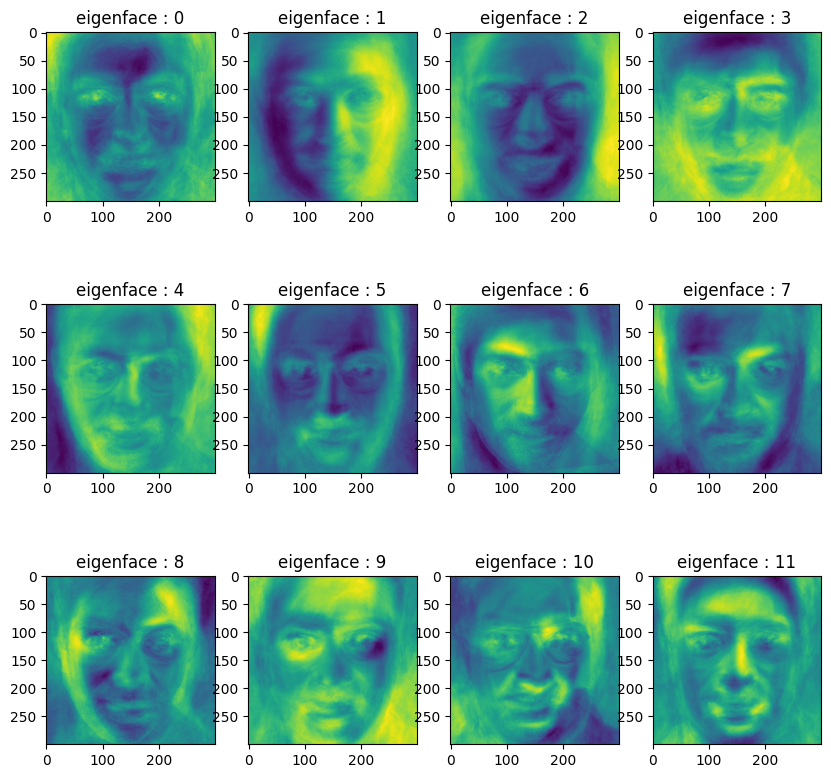

In [ ]:
#DISPLAYING FIRST 12 EIGEN FACES.
plt.subplots_adjust(bottom=5, left=5, right=5.2, top=5.2,hspace=10)
plt.figure(figsize=(10,10))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.imshow(eigenfaces[i])
    plt.title(f"eigenface : {i}")

plt.show()

In [ ]:
#TRANSFORMING OUR TRAINING AND TESTING DATA.
x_train = pca_data.transform(xtrain)
x_test= pca_data.transform(xtest)

In [ ]:
#APPLYTING lDA TO THE DATA

lda= LinearDiscriminantAnalysis()
x_train= lda.fit_transform(x_train, ytrain)
x_test= lda.transform(x_test)

# CREATING AN ANN MODEL.

In [ ]:
#CREATING MODEL.
model = Sequential()
model.add(Dense(8, activation='relu', input_dim= x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(9, activation='softmax'))


model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 8)                 72        
                                                                 
 dense_157 (Dense)           (None, 64)                576       
                                                                 
 dropout_110 (Dropout)       (None, 64)                0         
                                                                 
 dense_158 (Dense)           (None, 64)                4160      
                                                                 
 dropout_111 (Dropout)       (None, 64)                0         
                                                                 
 dense_159 (Dense)           (None, 32)                2080      
                                                                 
 dropout_112 (Dropout)       (None, 32)              

In [ ]:
#COMPILING MODEL
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#TRAINING MODEL.
history= model.fit(x_train, ytrain, epochs=70, validation_split=0.1)

Epoch 1/70
12/12 [==============================] - 3s 95ms/step - loss: 2.1760 - accuracy: 0.1484 - val_loss: 2.1441 - val_accuracy: 0.2195
Epoch 2/70
12/12 [==============================] - 0s 5ms/step - loss: 2.1409 - accuracy: 0.1401 - val_loss: 2.0570 - val_accuracy: 0.2195
Epoch 3/70
12/12 [==============================] - 0s 6ms/step - loss: 2.0583 - accuracy: 0.1648 - val_loss: 1.9569 - val_accuracy: 0.2195
Epoch 4/70
12/12 [==============================] - 0s 7ms/step - loss: 1.9892 - accuracy: 0.1868 - val_loss: 1.8750 - val_accuracy: 0.3415
Epoch 5/70
12/12 [==============================] - 0s 7ms/step - loss: 1.9280 - accuracy: 0.2225 - val_loss: 1.8240 - val_accuracy: 0.3415
Epoch 6/70
12/12 [==============================] - 0s 7ms/step - loss: 1.8343 - accuracy: 0.2747 - val_loss: 1.7476 - val_accuracy: 0.3659
Epoch 7/70
12/12 [==============================] - 0s 7ms/step - loss: 1.7554 - accuracy: 0.2940 - val_loss: 1.6468 - val_accuracy: 0.3659
Epoch 8/70
12/12 [=

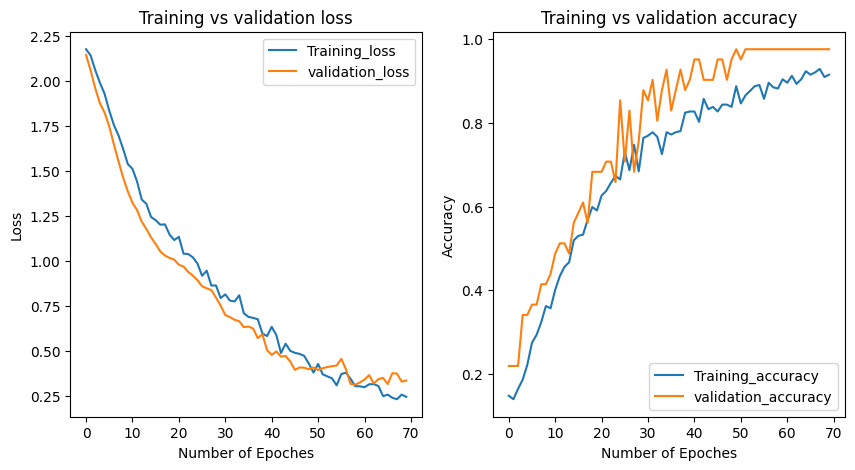

In [ ]:
#PLOTTING GRAPH.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title("Training vs validation loss")
plt.xlabel("Number of Epoches")
plt.ylabel("Loss")
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title("Training vs validation accuracy")
plt.xlabel("Number of Epoches")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()


In [ ]:
#CHECKING MODEL ACCURACY FOR TEST DATA
predicted= model.predict(x_test).argmax(axis=1)
print(f"Test accuracy{accuracy_score(ytest, predicted)}")

2/2 [==============================] - 0s 7ms/step
Test accuracy0.8222222222222222


In [ ]:
YTEST= pd.Series(ytest).map({0:"Aamir",1:'Ajay',2:'Akshay',3:'Alia',4:'Amitabh',5:'Deepika',6:'Disha',7:'Farhan',8:'Ileana'})
PREDICTED= pd.Series(predicted).map({0:"Aamir",1:'Ajay',2:'Akshay',3:'Alia',4:'Amitabh',5:'Deepika',6:'Disha',7:'Farhan',8:'Ileana'})

In [ ]:
#TAKING RANDOM SAMPLE TO CHECL FOR ACTUAL AND PREDICTED
sample= xtest[21:31]
actu= YTEST[21:31]
pred= PREDICTED[21:31]
percentage = model.predict(x_train[21:31])
prob=[]
for i in range(len(percentage)):
    prob.append(np.round(percentage[i].max(),2))

1/1 [==============================] - 0s 22ms/step


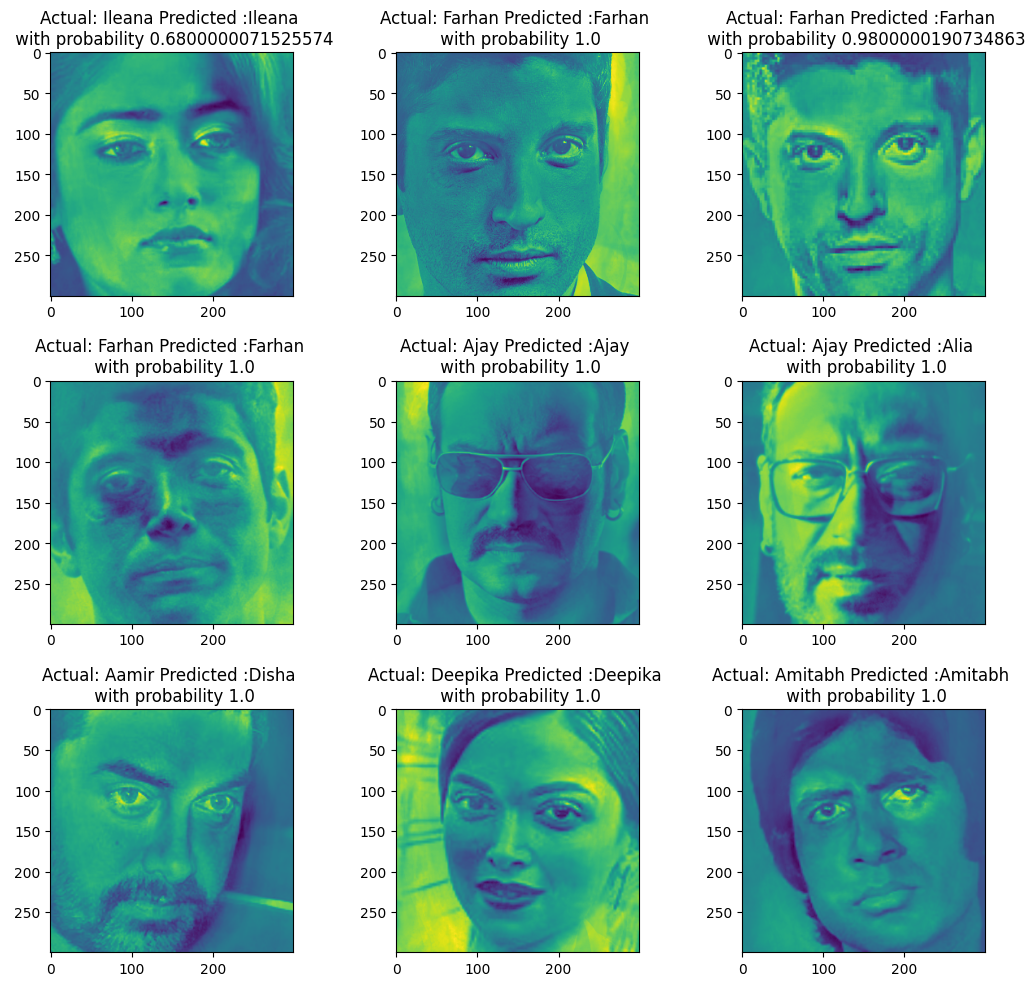

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(1,len(sample)):
    plt.subplot(3,3,i)
    pic= sample[i].reshape(300,300)
    plt.imshow(pic)
    plt.title(f'Actual: {np.array(actu)[i]} Predicted :{np.array(pred)[i]} \n with probability {prob[i]}')
plt.show()

# PREDICTING FOR IMPOSTER IMAGES (NOT IN TRAINING AND TESTING DATASET)

In [ ]:
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/imposter/aamir khan.jpeg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(300,300))
img= img.flatten()

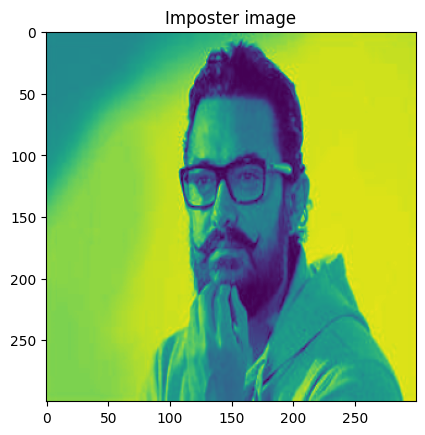

In [ ]:
plt.imshow(img.reshape(300,300))
plt.title("Imposter image")
plt.show()

In [ ]:
#PCA
a= pca_data.transform([img])
#LDA
b= lda.transform(a)


In [ ]:

if(model.predict(b).argmax(axis=1)==0):
  print("Person in photo is Aamir")
elif(model.predict(b).argmax(axis=1)==1):
  print("Person in photo is Ajay")
elif(model.predict(b).argmax(axis=1)==2):
  print("Person in photo is Akshay")
elif(model.predict(b).argmax(axis=1)==3):
  print("Person in photo is Alia")
elif(model.predict(b).argmax(axis=1)==4):
  print("Person in photo is Amitabh")
elif(model.predict(b).argmax(axis=1)==5):
  print("Person in photo is Deepika")
elif(model.predict(b).argmax(axis=1)==6):
  print("Person in photo is Disha")
elif(model.predict(b).argmax(axis=1)==7):
  print("Person in photo is Farhan")
else:
  print("Person in photo is Ileana")

1/1 [==============================] - 0s 72ms/step
Aamir


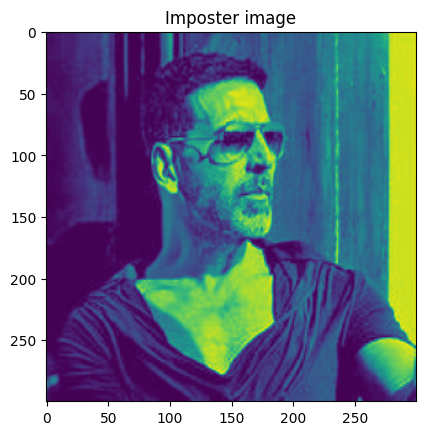

In [ ]:
#PREDICTING 2ND IMPOSTER
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/Internship Project./AI project/imposter/ak.jpeg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(300,300))
img= img.flatten()

plt.imshow(img.reshape(300,300))
plt.title("Imposter image")
plt.show()

#PCA
a= pca_data.transform([img])
#LDA
b= lda.transform(a)


In [ ]:
if(model.predict(b).argmax(axis=1)==0):
  print("Person in photo is Aamir")
elif(model.predict(b).argmax(axis=1)==1):
  print("Person in photo is Ajay")
elif(model.predict(b).argmax(axis=1)==2):
  print("Person in photo is Akshay")
elif(model.predict(b).argmax(axis=1)==3):
  print("Person in photo is Alia")
elif(model.predict(b).argmax(axis=1)==4):
  print("Person in photo is Amitabh")
elif(model.predict(b).argmax(axis=1)==5):
  print("Person in photo is Deepika")
elif(model.predict(b).argmax(axis=1)==6):
  print("Person in photo is Disha")
elif(model.predict(b).argmax(axis=1)==7):
  print("Person in photo is Farhan")
else:
  print("Person in photo is Ileana")

1/1 [==============================] - 0s 22ms/step
Person in photo is Akshay
